# <b>Dense prediction of label noise for learning building extraction</b>

### <b>Import pakcages

In [1]:
import os
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

### <b> Fetch models and sample test images

In [2]:
!git clone https://github.com/nahian-ahmed/dense-label-noise.git


Cloning into 'dense-label-noise'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 62 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (62/62), done.


### <b> Load models

In [3]:
# Clean Label model
CL_model = tf.keras.models.load_model('dense-label-noise/models/CL-model.h5')

# Noisy Label model
NL_model = tf.keras.models.load_model('dense-label-noise/models/NL-model.h5')

# Intermediate Error Matrix model
I_EM_model = tf.keras.models.load_model('dense-label-noise/models/I-EM-model.h5')

# Intermediate False Positve False Negative Error Matrix model
I_FPFN_EM_model = tf.keras.models.load_model('dense-label-noise/models/I-FPFN-EM-model.h5')

# Error Matrix model
EM_model = tf.keras.models.load_model('dense-label-noise/models/EM-model.h5')

# False Positive Error Matrix model
FP_EM_model = tf.keras.models.load_model('dense-label-noise/models/FP-EM-model.h5')

# False Negative Error Matrix model
FN_EM_model = tf.keras.models.load_model('dense-label-noise/models/FN-EM-model.h5')

### <b>Sample test image filenames

In [4]:
sample_filenames = [
                    'tile_9216_16896.tif',
                    'tile_26112_24064.tif',
                    'tile_9728_15360.tif',
                    'tile_25088_24064.tif',
                    'tile_16384_23552.tif',
                    'tile_8704_39936.tif',
                    'tile_30720_14336.tif',
                    ]

### <b>Building label predictions

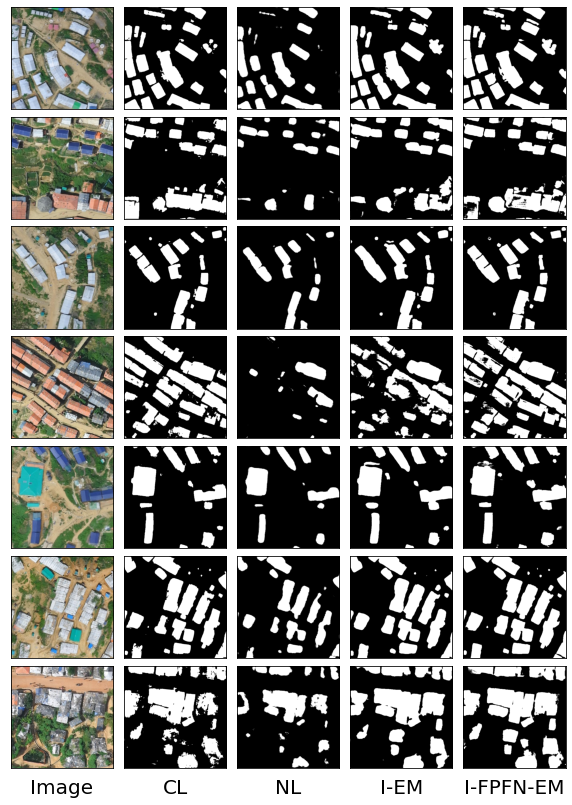

In [5]:

f, axarr = plt.subplots(7,5)


plt.subplots_adjust(wspace=0.075, hspace=0.075)

for i in range(7):
        for j in range(5):
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])

for i, filename in enumerate(sample_filenames):
    image = np.array(Image.open('dense-label-noise/sample-test-images/'+sample_filenames[i]))
    
    pred_1 = CL_model.predict(np.array(image).reshape(1,512,512,3))
    pred_1 = (pred_1>=0.5).astype(int).reshape(512,512)

    pred_2 = NL_model.predict(np.array(image).reshape(1,512,512,3))
    pred_2 = (pred_2>=0.5).astype(int).reshape(512,512)

    pred_3 = I_EM_model.predict(np.array(image).reshape(1,512,512,3))
    pred_3 = (pred_3>=0.5).astype(int).reshape(512,512)

    pred_4 = I_FPFN_EM_model.predict(np.array(image).reshape(1,512,512,3))
    pred_4 = (pred_4>=0.5).astype(int).reshape(512,512)
    
    axarr[i,0].imshow(image)
    axarr[i,1].imshow(pred_1, cmap='gray')
    axarr[i,2].imshow(pred_2, cmap='gray')
    axarr[i,3].imshow(pred_3, cmap='gray')
    axarr[i,4].imshow(pred_4, cmap='gray')

labs = ['Image','CL','NL','I-EM','I-FPFN-EM']
for i in range(5):
    axarr[6,i].text(0.5, -0.2, labs[i],fontsize=20, horizontalalignment='center', verticalalignment='center', transform=axarr[6,i].transAxes)


f.set_size_inches(10, 14)


### <b>Error matrix predictions

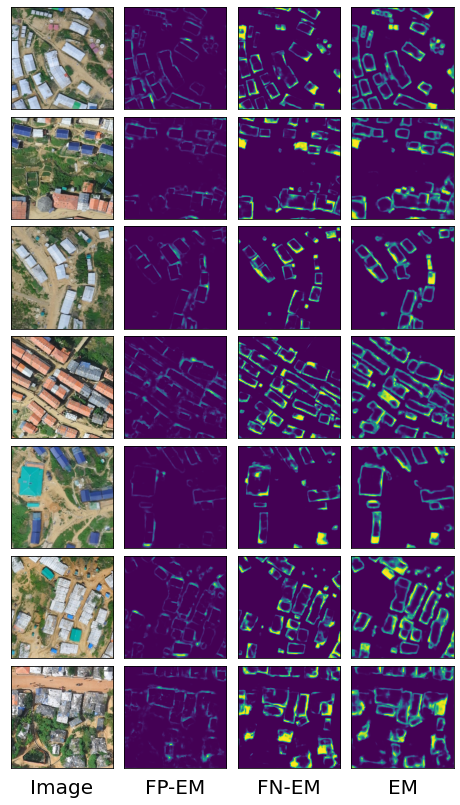

In [6]:

f, axarr = plt.subplots(7,4)


plt.subplots_adjust(wspace=0.075, hspace=0.075)

for i in range(7):
        for j in range(4):
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])

for i, filename in enumerate(sample_filenames):
    image = np.array(Image.open('dense-label-noise/sample-test-images/'+sample_filenames[i]))

    pred_1 = FP_EM_model.predict(np.array(image).reshape(1,512,512,3))
    pred_1 = pred_1.reshape(512,512)

    pred_2 = FN_EM_model.predict(np.array(image).reshape(1,512,512,3))
    pred_2 = pred_2.reshape(512,512)
    
    pred_3 = EM_model.predict(np.array(image).reshape(1,512,512,3))
    pred_3 = pred_3.reshape(512,512)
    
    axarr[i,0].imshow(image)
    axarr[i,1].imshow(pred_1, cmap='viridis')
    axarr[i,2].imshow(pred_2, cmap='viridis')
    axarr[i,3].imshow(pred_3,cmap='viridis')

labs = ['Image','FP-EM','FN-EM','EM']
for i in range(4):
    axarr[6,i].text(0.5, -0.2, labs[i],fontsize=20, horizontalalignment='center', verticalalignment='center', transform=axarr[6,i].transAxes)


f.set_size_inches(8, 14)
